# Exercise Set 6: Data Structuring 2

*Afternoon, August 15, 2018*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [83]:
# [Answer to Ex. 6.1.1]
import pandas as pd

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
wdf = pd.DataFrame(df_sorted)

In [84]:
wdf.head(10)

,station,datetime,obs_type,obs_value,TMAX_F
16,ITE00100550,18640117,TMAX,-6.3,20.66
17,ITE00100550,18640118,TMAX,-5.0,23.00
13,ITE00100550,18640114,TMAX,-5.0,23.00
12,ITE00100550,18640113,TMAX,-4.3,24.26
14,ITE00100550,18640115,TMAX,-3.1,26.42
2,ITE00100550,18640103,TMAX,-2.8,26.96
15,ITE00100550,18640116,TMAX,-2.5,27.50
11,ITE00100550,18640112,TMAX,-2.5,27.50
4,ITE00100550,18640105,TMAX,-1.9,28.58
41,ITE00100550,18640211,TMAX,-1.8,28.76


> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [85]:
# [Answer to Ex. 6.1.2]
wdf["Date"] = pd.to_datetime(wdf["datetime"], format="%Y%m%d")
wdf['Month'] = pd.DatetimeIndex(wdf['Date']).month
wdf.head(10)

,station,datetime,obs_type,obs_value,TMAX_F,Date,Month
16,ITE00100550,18640117,TMAX,-6.3,20.66,1864-01-17,1
17,ITE00100550,18640118,TMAX,-5.0,23.00,1864-01-18,1
13,ITE00100550,18640114,TMAX,-5.0,23.00,1864-01-14,1
12,ITE00100550,18640113,TMAX,-4.3,24.26,1864-01-13,1
14,ITE00100550,18640115,TMAX,-3.1,26.42,1864-01-15,1
2,ITE00100550,18640103,TMAX,-2.8,26.96,1864-01-03,1
15,ITE00100550,18640116,TMAX,-2.5,27.50,1864-01-16,1
11,ITE00100550,18640112,TMAX,-2.5,27.50,1864-01-12,1
4,ITE00100550,18640105,TMAX,-1.9,28.58,1864-01-05,1
41,ITE00100550,18640211,TMAX,-1.8,28.76,1864-02-11,2


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

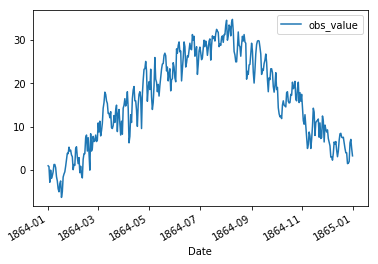

In [86]:
# [Answer to Ex. 6.1.3]
ts_wdf = wdf[["obs_value", "Date"]]
ts_wdf.set_index("Date").plot()

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [87]:
# [Answer to Ex. 6.1.4]
import re

# for col in wdf:
wdf["country"] = [''.join(re.findall("[a-zA-Z]+", item)) for item in wdf["station"]]
wdf.head(10)

# wdf["country1"] = wdf["station"].astype(str).str[0:3]

# word1 = " ".join(re.findall("[a-zA-Z]+", st))
# wdf[["country"]] = "".join(re.findall("[a-zA-Z]+", "ITE00100550" ))
# re.sub("[^A-Za-z]", "", wdf[["station"]])
# ''.join(filter(str.isalpha, wdf[["station"]]))
# wdf['station'].str.extract("\(([A-Za-z0-9 _]+)\)")
# wdf["station"].join(re.findall("[a-zA-Z]+", "string"))


,station,datetime,obs_type,obs_value,TMAX_F,Date,Month,country
16,ITE00100550,18640117,TMAX,-6.3,20.66,1864-01-17,1,ITE
17,ITE00100550,18640118,TMAX,-5.0,23.00,1864-01-18,1,ITE
13,ITE00100550,18640114,TMAX,-5.0,23.00,1864-01-14,1,ITE
12,ITE00100550,18640113,TMAX,-4.3,24.26,1864-01-13,1,ITE
14,ITE00100550,18640115,TMAX,-3.1,26.42,1864-01-15,1,ITE
2,ITE00100550,18640103,TMAX,-2.8,26.96,1864-01-03,1,ITE
15,ITE00100550,18640116,TMAX,-2.5,27.50,1864-01-16,1,ITE
11,ITE00100550,18640112,TMAX,-2.5,27.50,1864-01-12,1,ITE
4,ITE00100550,18640105,TMAX,-1.9,28.58,1864-01-05,1,ITE
41,ITE00100550,18640211,TMAX,-1.8,28.76,1864-02-11,2,ITE


> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [88]:
# [Answer to Ex. 6.1.5]
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
wdf2 = pd.DataFrame(df_sorted)

In [89]:
wdf2["Date"] = pd.to_datetime(wdf2["datetime"], format="%Y%m%d")
wdf2['Month'] = pd.DatetimeIndex(wdf2['Date']).month
wdf2.head(10)

,station,datetime,obs_type,obs_value,TMAX_F,Date,Month
845,SZ000006717,18640226,TMAX,-34.0,-29.20,1864-02-26,2
577,SZ000006717,18640208,TMAX,-17.4,0.68,1864-02-08,2
699,CA006158350,18640217,TMAX,-16.7,1.94,1864-02-17,2
42,SZ000006717,18640103,TMAX,-16.5,2.30,1864-01-03,1
16,CA006158350,18640102,TMAX,-16.1,3.02,1864-01-02,1
607,SZ000006717,18640210,TMAX,-15.9,3.38,1864-02-10,2
199,EZE00100082,18640114,TMAX,-15.1,4.82,1864-01-14,1
592,SZ000006717,18640209,TMAX,-15.0,5.00,1864-02-09,2
741,SZ000006717,18640219,TMAX,-14.7,5.54,1864-02-19,2
533,SZ000006717,18640205,TMAX,-14.4,6.08,1864-02-05,2


In [91]:
wdf2["country"] = [''.join(re.findall("[a-zA-Z]+", item)) for item in wdf2["station"]]
wdf2.head(10)

,station,datetime,obs_type,obs_value,TMAX_F,Date,Month,country
845,SZ000006717,18640226,TMAX,-34.0,-29.20,1864-02-26,2,SZ
577,SZ000006717,18640208,TMAX,-17.4,0.68,1864-02-08,2,SZ
699,CA006158350,18640217,TMAX,-16.7,1.94,1864-02-17,2,CA
42,SZ000006717,18640103,TMAX,-16.5,2.30,1864-01-03,1,SZ
16,CA006158350,18640102,TMAX,-16.1,3.02,1864-01-02,1,CA
607,SZ000006717,18640210,TMAX,-15.9,3.38,1864-02-10,2,SZ
199,EZE00100082,18640114,TMAX,-15.1,4.82,1864-01-14,1,EZE
592,SZ000006717,18640209,TMAX,-15.0,5.00,1864-02-09,2,SZ
741,SZ000006717,18640219,TMAX,-14.7,5.54,1864-02-19,2,SZ
533,SZ000006717,18640205,TMAX,-14.4,6.08,1864-02-05,2,SZ


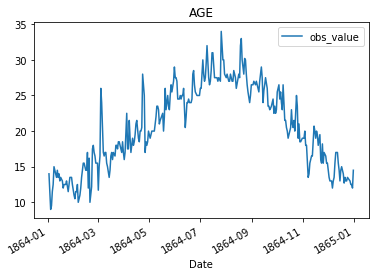

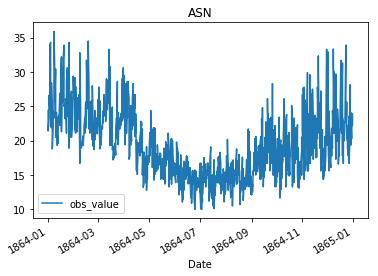

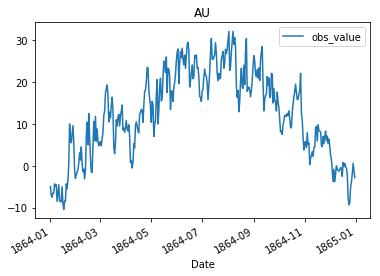

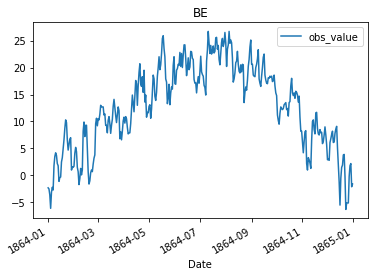

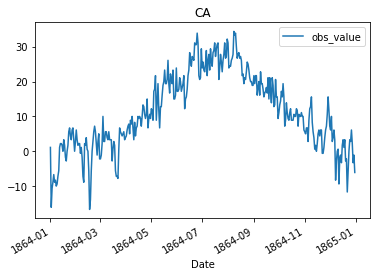

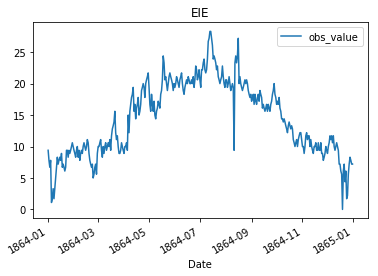

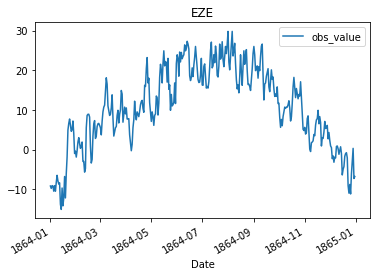

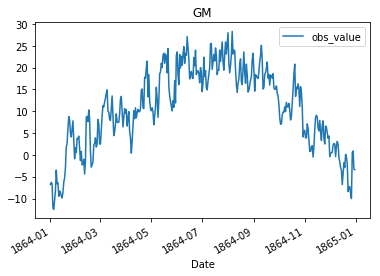

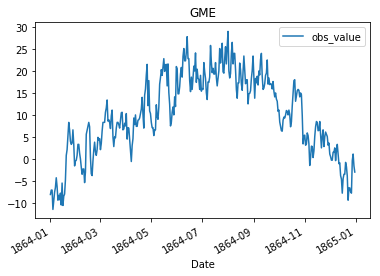

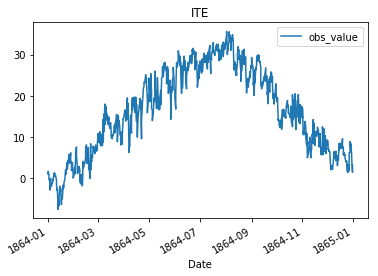

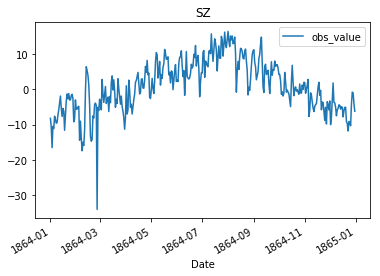

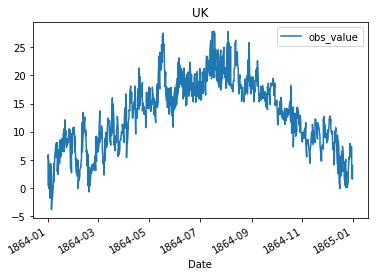

In [109]:
ts_wdf2 = wdf2[["obs_value", "Date", "country"]]
ts_wdf2.head(5)
# ts_wdf2.set_index("Date").plot()
# ts_wdf2.set_index("Date").groupby("country").plot()

for title, group in ts_wdf2.groupby('country'):
    group.plot(x='Date', y='obs_value', title=title)


##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [ ]:
# [Answer to Ex. 6.2.1]

> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [ ]:
# [Answer to Ex. 6.2.2]

> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [ ]:
# [Answer to Ex. 6.2.3]

> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [ ]:
# [Answer to Ex. 6.2.4]